# Scraping: https://www.cnn.gr/search?q=covid

Παίρνω περιεχόμενο από το CNN.gr με αναζήτηση της λέξης "covid" Θέλω:

* Τίτλους (Headlines)
* Υπερσυνδέσεις (link)
* Ημερομηνίες (date)
* Κατηγορίες (category)


 **Εισάγω τα απαραίτητα libraries**.

In [ ]:
import requests
from bs4 import BeautifulSoup

 **Κατεβάζω την ιστοσελίδα** και *να την εισάγω στο BeautifulSoup*.

In [ ]:
stories = []
for p in range(1,8):
    response = requests.get('https://www.cnn.gr/search?q=covid&page='+str(p))
    soup = BeautifulSoup(response.text, 'html.parser')
    stories.append(soup.find_all('div', { 'class': 'gtr' }))
    

Και δημιουργώ αρχικά 4 στήλες 

In [ ]:
# Ξεκινάω με μια άδεια λίστα
stories_list = []
for page in stories:
    for story in page:
        headline = story.find('h3')
        link = story.find('a', { 'class': 'item-link' })
        date = story.find('span', { 'class': 'item-date' })
        category = story.find('span', { 'class' : 'item-category' })

        if headline:
            headline_text = headline.text
        else:
            continue    
        if link:
            link_text = link['href']
        else:
            continue              
        if date:
            date_text = date.text
        else:
            continue
        if category:
            category_text = category.text
        else:
            continue  
            
          
        story_dict = {
                'headline': headline_text,
                'url': link_text,
                'date': date_text,
                'category': category_text
            }
        
        # Πρoσθέτω το λέξικο στη λίστα
        stories_list.append(story_dict)

print(stories_list)




[{'headline': ' \t\t\t\t\t\t\tΚορωνοϊός: Σαρωτικοί έλεγχοι σε χώρους εστίασης και διασκέδασης μετά την «έκρηξη» κρουσμάτων\t\t\t\t\t', 'url': '/ellada/story/273178/koronoios-sarotikoi-elegxoi-se-xoroys-estiasis-kai-diaskedasis-meta-tin-ekrixi-kroysmaton', 'date': '\n\t\t\t07 Ιουλ 2021 20:45\t\t', 'category': 'ΕΛΛΑΔΑ'}, {'headline': ' \t\t\t\t\t\t\tΚορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδα με αριθμούς (7/07)\t\t\t\t\t', 'url': '/ellada/video/273172/koronoios-h-exaplosi-tis-covid-19-stin-ellada-me-arithmoys-7-07', 'date': '\n\t\t\t07 Ιουλ 2021 19:46\t\t', 'category': 'ΕΛΛΑΔΑ'}, {'headline': ' \t\t\t\t\t\t\tΚυβέρνηση: Νωρίτερα τα μέτρα - «χαλινάρι» στη διασπορά του κορωνοϊού\t\t\t\t\t', 'url': '/politiki/story/273050/kyvernisi-noritera-ta-metra-xalinari-sti-diaspora-toy-koronoioy', 'date': '\n\t\t\t07 Ιουλ 2021 07:23\t\t', 'category': 'ΠΟΛΙΤΙΚΗ'}, {'headline': ' \t\t\t\t\t\t\tΣύσταση ΠΟΥ για χρήση φαρμάκων για την αρθρίτιδα σε συνδυασμό με κορτικοστεροειδή σε ασθενείς Covid\t\t\t\t\t

Το μετατρέπω σε μορφή dataframe και Σώζω το αρχείο ως csv

In [ ]:
import pandas as pd
df = pd.DataFrame(stories_list)
df.to_csv("cnn.csv", index=False)

In [ ]:
df

headline  ...  category
0     \t\t\t\t\t\t\tΚορωνοϊός: Σαρωτικοί έλεγχοι σε...  ...    ΕΛΛΑΔΑ
1     \t\t\t\t\t\t\tΚορωνοϊός: Η εξάπλωση της Covid...  ...    ΕΛΛΑΔΑ
2     \t\t\t\t\t\t\tΚυβέρνηση: Νωρίτερα τα μέτρα - ...  ...  ΠΟΛΙΤΙΚΗ
3     \t\t\t\t\t\t\tΣύσταση ΠΟΥ για χρήση φαρμάκων ...  ...    ΚΟΣΜΟΣ
4     \t\t\t\t\t\t\tΜετάλλαξη Δέλτα στο Ισραήλ: 500...  ...    ΚΟΣΜΟΣ
..                                                 ...  ...       ...
205   \t\t\t\t\t\t\tΤο island hopping αλλάζει και «...  ...    ΕΛΛΑΔΑ
206   \t\t\t\t\t\t\tΣτην τελική ευθεία το Πιστοποιη...  ...    ΕΛΛΑΔΑ
207   \t\t\t\t\t\t\tΚορωνοϊός: Η εξάπλωση της Covid...  ...    ΕΛΛΑΔΑ
208   \t\t\t\t\t\t\tΠελώνη για επίσκεψη Τσαβούσογλο...  ...  ΠΟΛΙΤΙΚΗ
209   \t\t\t\t\t\t\tΕκτροπή αεροσκάφους: Έκτακτη συ...  ...  ΠΟΛΙΤΙΚΗ

[210 rows x 4 columns]

Κάνω καθαρισμό των δεδομένων

In [ ]:
df['headline'] = df['headline'].str.replace(r'\t' ,'' )
df['headline']

0       Κορωνοϊός: Σαρωτικοί έλεγχοι σε χώρους εστίασ...
1       Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...
2       Κυβέρνηση: Νωρίτερα τα μέτρα - «χαλινάρι» στη...
3       Σύσταση ΠΟΥ για χρήση φαρμάκων για την αρθρίτ...
4       Μετάλλαξη Δέλτα στο Ισραήλ: 500 νέα κρούσματα...
                             ...                        
205     Το island hopping αλλάζει και «επιλέγει» yach...
206     Στην τελική ευθεία το Πιστοποιητικό Covid: «Ο...
207     Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...
208     Πελώνη για επίσκεψη Τσαβούσογλου: Δεν ενημερω...
209     Εκτροπή αεροσκάφους: Έκτακτη συνεδρίαση του Σ...
Name: headline, Length: 210, dtype: object

In [ ]:
df['date'] = df['date'].str.replace(r'\n' ,'' )
df['date'] = df['date'].str.replace(r'\t' ,'' )
df['date']

0      07 Ιουλ 2021 20:45
1      07 Ιουλ 2021 19:46
2      07 Ιουλ 2021 07:23
3      06 Ιουλ 2021 23:45
4      06 Ιουλ 2021 19:49
              ...        
205     26 Μάι 2021 21:34
206     26 Μάι 2021 20:59
207     26 Μάι 2021 19:43
208     26 Μάι 2021 12:24
209     26 Μάι 2021 10:48
Name: date, Length: 210, dtype: object

In [ ]:
df['date'] = df['date'].str.replace(r'Ιουλ' ,'07' )
df['date']

0       07 07 2021 20:45
1       07 07 2021 19:46
2       07 07 2021 07:23
3       06 07 2021 23:45
4       06 07 2021 19:49
             ...        
205    26 Μάι 2021 21:34
206    26 Μάι 2021 20:59
207    26 Μάι 2021 19:43
208    26 Μάι 2021 12:24
209    26 Μάι 2021 10:48
Name: date, Length: 210, dtype: object

In [ ]:
df['date'] = df['date'].str.replace(r'Ιουν' ,'06' )
df['date']

0       07 07 2021 20:45
1       07 07 2021 19:46
2       07 07 2021 07:23
3       06 07 2021 23:45
4       06 07 2021 19:49
             ...        
205    26 Μάι 2021 21:34
206    26 Μάι 2021 20:59
207    26 Μάι 2021 19:43
208    26 Μάι 2021 12:24
209    26 Μάι 2021 10:48
Name: date, Length: 210, dtype: object

In [ ]:
df['date'] = df['date'].str.replace(r'Μάι' ,'05' )
df['date']

0      07 07 2021 20:45
1      07 07 2021 19:46
2      07 07 2021 07:23
3      06 07 2021 23:45
4      06 07 2021 19:49
             ...       
205    26 05 2021 21:34
206    26 05 2021 20:59
207    26 05 2021 19:43
208    26 05 2021 12:24
209    26 05 2021 10:48
Name: date, Length: 210, dtype: object

In [ ]:
df

headline  ...  category
0     Κορωνοϊός: Σαρωτικοί έλεγχοι σε χώρους εστίασ...  ...    ΕΛΛΑΔΑ
1     Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2     Κυβέρνηση: Νωρίτερα τα μέτρα - «χαλινάρι» στη...  ...  ΠΟΛΙΤΙΚΗ
3     Σύσταση ΠΟΥ για χρήση φαρμάκων για την αρθρίτ...  ...    ΚΟΣΜΟΣ
4     Μετάλλαξη Δέλτα στο Ισραήλ: 500 νέα κρούσματα...  ...    ΚΟΣΜΟΣ
..                                                 ...  ...       ...
205   Το island hopping αλλάζει και «επιλέγει» yach...  ...    ΕΛΛΑΔΑ
206   Στην τελική ευθεία το Πιστοποιητικό Covid: «Ο...  ...    ΕΛΛΑΔΑ
207   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
208   Πελώνη για επίσκεψη Τσαβούσογλου: Δεν ενημερω...  ...  ΠΟΛΙΤΙΚΗ
209   Εκτροπή αεροσκάφους: Έκτακτη συνεδρίαση του Σ...  ...  ΠΟΛΙΤΙΚΗ

[210 rows x 4 columns]

Αφαιρώ την ώρα από τη στήλη date

In [ ]:
df['date'] = df['date'].str.replace(r'\d\d:\d\d' ,'' )
df['date']

0      07 07 2021 
1      07 07 2021 
2      07 07 2021 
3      06 07 2021 
4      06 07 2021 
          ...     
205    26 05 2021 
206    26 05 2021 
207    26 05 2021 
208    26 05 2021 
209    26 05 2021 
Name: date, Length: 210, dtype: object

In [ ]:
df

headline  ...  category
0     Κορωνοϊός: Σαρωτικοί έλεγχοι σε χώρους εστίασ...  ...    ΕΛΛΑΔΑ
1     Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2     Κυβέρνηση: Νωρίτερα τα μέτρα - «χαλινάρι» στη...  ...  ΠΟΛΙΤΙΚΗ
3     Σύσταση ΠΟΥ για χρήση φαρμάκων για την αρθρίτ...  ...    ΚΟΣΜΟΣ
4     Μετάλλαξη Δέλτα στο Ισραήλ: 500 νέα κρούσματα...  ...    ΚΟΣΜΟΣ
..                                                 ...  ...       ...
205   Το island hopping αλλάζει και «επιλέγει» yach...  ...    ΕΛΛΑΔΑ
206   Στην τελική ευθεία το Πιστοποιητικό Covid: «Ο...  ...    ΕΛΛΑΔΑ
207   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
208   Πελώνη για επίσκεψη Τσαβούσογλου: Δεν ενημερω...  ...  ΠΟΛΙΤΙΚΗ
209   Εκτροπή αεροσκάφους: Έκτακτη συνεδρίαση του Σ...  ...  ΠΟΛΙΤΙΚΗ

[210 rows x 4 columns]

Φτιάχνω ένα wordcloud για τη στήλη headline

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df['headline']

0       Κορωνοϊός: Σαρωτικοί έλεγχοι σε χώρους εστίασ...
1       Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...
2       Κυβέρνηση: Νωρίτερα τα μέτρα - «χαλινάρι» στη...
3       Σύσταση ΠΟΥ για χρήση φαρμάκων για την αρθρίτ...
4       Μετάλλαξη Δέλτα στο Ισραήλ: 500 νέα κρούσματα...
                             ...                        
205     Το island hopping αλλάζει και «επιλέγει» yach...
206     Στην τελική ευθεία το Πιστοποιητικό Covid: «Ο...
207     Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...
208     Πελώνη για επίσκεψη Τσαβούσογλου: Δεν ενημερω...
209     Εκτροπή αεροσκάφους: Έκτακτη συνεδρίαση του Σ...
Name: headline, Length: 210, dtype: object

Αφαιρώ τα κενά

In [ ]:
headline = df['headline'].str.cat(sep = ' ').replace("amp", ' ')


In [ ]:
headline

" Κορωνοϊός: Σαρωτικοί έλεγχοι σε χώρους εστίασης και διασκέδασης μετά την «έκρηξη» κρουσμάτων  Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδα με αριθμούς (7/07)  Κυβέρνηση: Νωρίτερα τα μέτρα - «χαλινάρι» στη διασπορά του κορωνοϊού  Σύσταση ΠΟΥ για χρήση φαρμάκων για την αρθρίτιδα σε συνδυασμό με κορτικοστεροειδή σε ασθενείς Covid  Μετάλλαξη Δέλτα στο Ισραήλ: 500 νέα κρούσματα, κανένας θάνατος  Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδα με αριθμούς (6/07)  Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδα με αριθμούς (5/07)  Κορωνοϊός - Μητσοτάκης: Να επικεντρώσουμε την προσοχή μας στο συνωστισμό λόγω διασκέδασης  Εμβόλια κατά των μεταλλάξεων: Τρεις αλήθειες για τους εμβολιασμένους και τους ανεμβολίαστους  Κορωνοϊός: Η θεωρία διαρροής από τη Γουχάν - Συναγερμός από τον ΠΟΥ για τη βιοασφάλεια των πειραμάτων  Νότια Αφρική: Νέο ρεκόρ 26.000 ημερήσιων κρουσμάτων Covid 19  Πέτσας: Ανοιχτό το ενδεχόμενο για μέτρα και στις μετακινήσεις από νομό σε νομό  Οδηγός διακοπών στα νησιά: Τι αλλάζει 

Αφαίρεση stopwords

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
nlp=spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['κάμποσον',
 'εαυτού',
 'είστε',
 'οποιουσδήποτε',
 'πάντοτε',
 'όποιον',
 'είμαστε',
 'όσος',
 'πριν',
 'μόνο',
 'πόση',
 'κάνεν',
 'η',
 'ίδιοσ',
 'σου',
 'είσαι',
 'είχες',
 'κάπου',
 'μία',
 'προχτές']

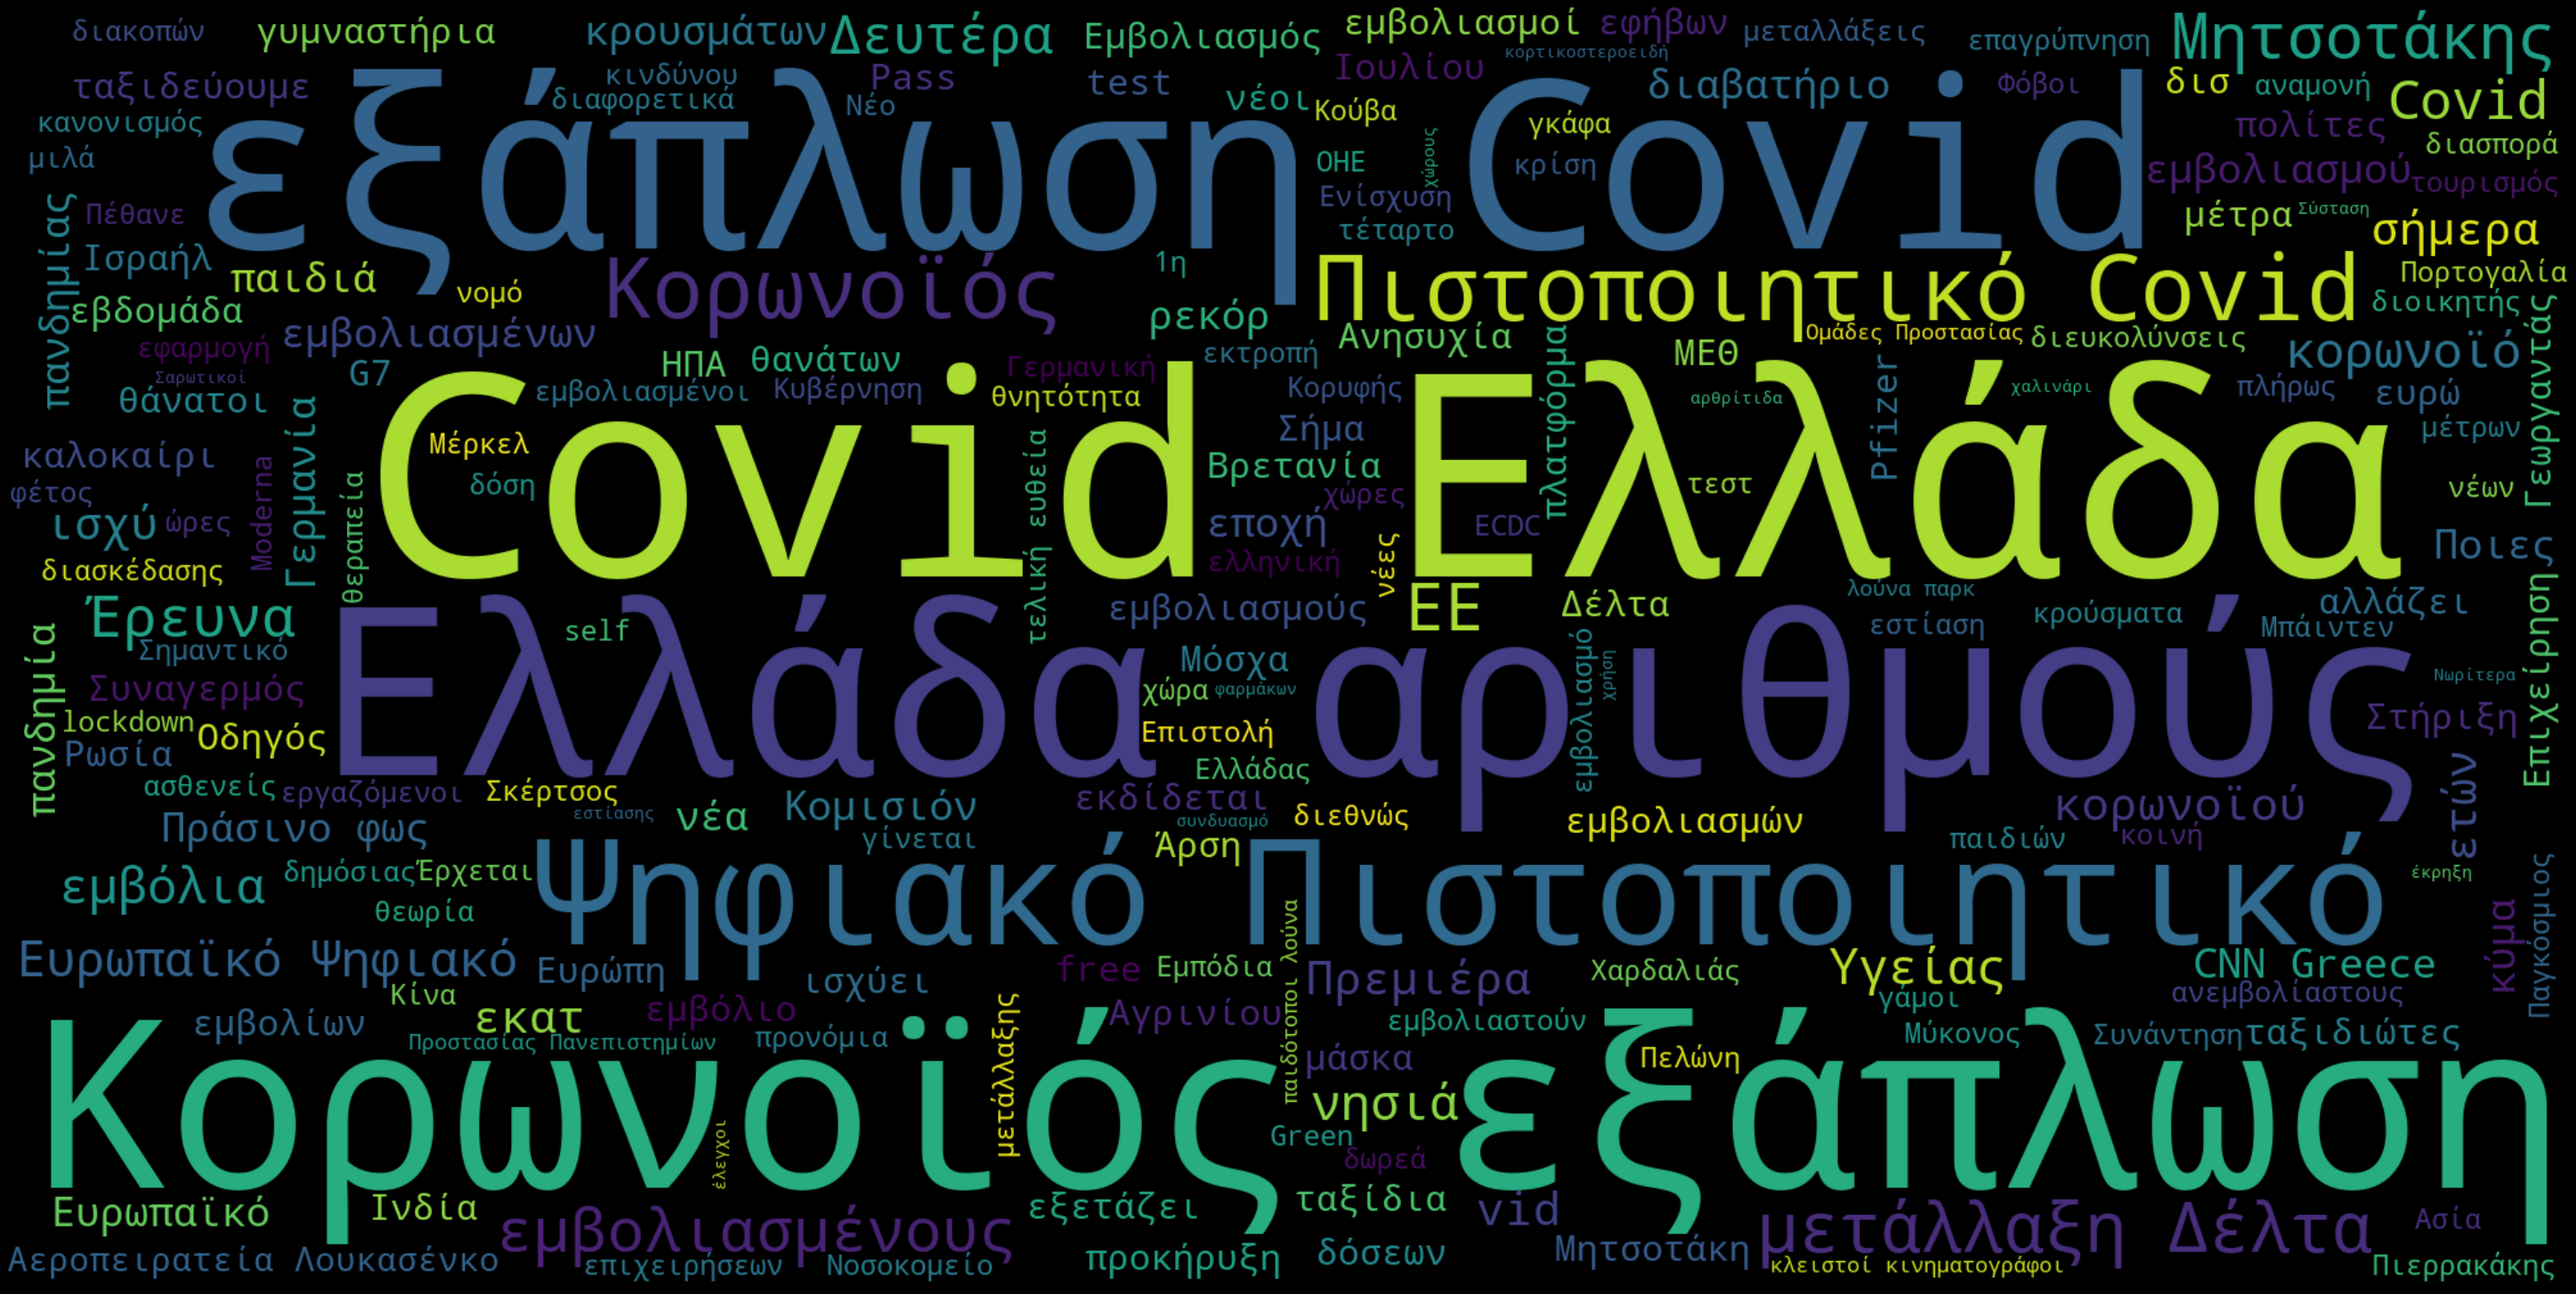

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(headline)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Μετατροπή λέξεων στην ονομαστική, και των ρημάτων στο 1ο πρόσωπο

In [ ]:
doc = nlp(df['headline'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

   
Κορωνοϊός κορωνοϊός
: :
Η η
εξάπλωση εξάπλωση
της της
Covid covid
19 19
στην στην
Ελλάδα Ελλάδα
με με
αριθμούς αριθμού
( (
7/07 7/07
) )


In [ ]:
' '.join(token.lemma_ for token in doc)

'  κορωνοϊός : η εξάπλωση της covid 19 στην Ελλάδα με αριθμού ( 7/07 )'

In [ ]:
headline

" Κορωνοϊός: Σαρωτικοί έλεγχοι σε χώρους εστίασης και διασκέδασης μετά την «έκρηξη» κρουσμάτων  Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδα με αριθμούς (7/07)  Κυβέρνηση: Νωρίτερα τα μέτρα - «χαλινάρι» στη διασπορά του κορωνοϊού  Σύσταση ΠΟΥ για χρήση φαρμάκων για την αρθρίτιδα σε συνδυασμό με κορτικοστεροειδή σε ασθενείς Covid  Μετάλλαξη Δέλτα στο Ισραήλ: 500 νέα κρούσματα, κανένας θάνατος  Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδα με αριθμούς (6/07)  Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδα με αριθμούς (5/07)  Κορωνοϊός - Μητσοτάκης: Να επικεντρώσουμε την προσοχή μας στο συνωστισμό λόγω διασκέδασης  Εμβόλια κατά των μεταλλάξεων: Τρεις αλήθειες για τους εμβολιασμένους και τους ανεμβολίαστους  Κορωνοϊός: Η θεωρία διαρροής από τη Γουχάν - Συναγερμός από τον ΠΟΥ για τη βιοασφάλεια των πειραμάτων  Νότια Αφρική: Νέο ρεκόρ 26.000 ημερήσιων κρουσμάτων Covid 19  Πέτσας: Ανοιχτό το ενδεχόμενο για μέτρα και στις μετακινήσεις από νομό σε νομό  Οδηγός διακοπών στα νησιά: Τι αλλάζει 

In [ ]:
full_doc = nlp(headline)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

' χαλινάρι » στη διασπορά του κορωνοϊός   σύσταση πο για χρήση φαρμάκο για την αρθρίτιδα σε συνδυασμό με κορτικοστεροειδή σε ασθενείς covid   μετάλλαξη δέλτα στο ισραήλ : 500 νέος κρούσματας , κανένας '

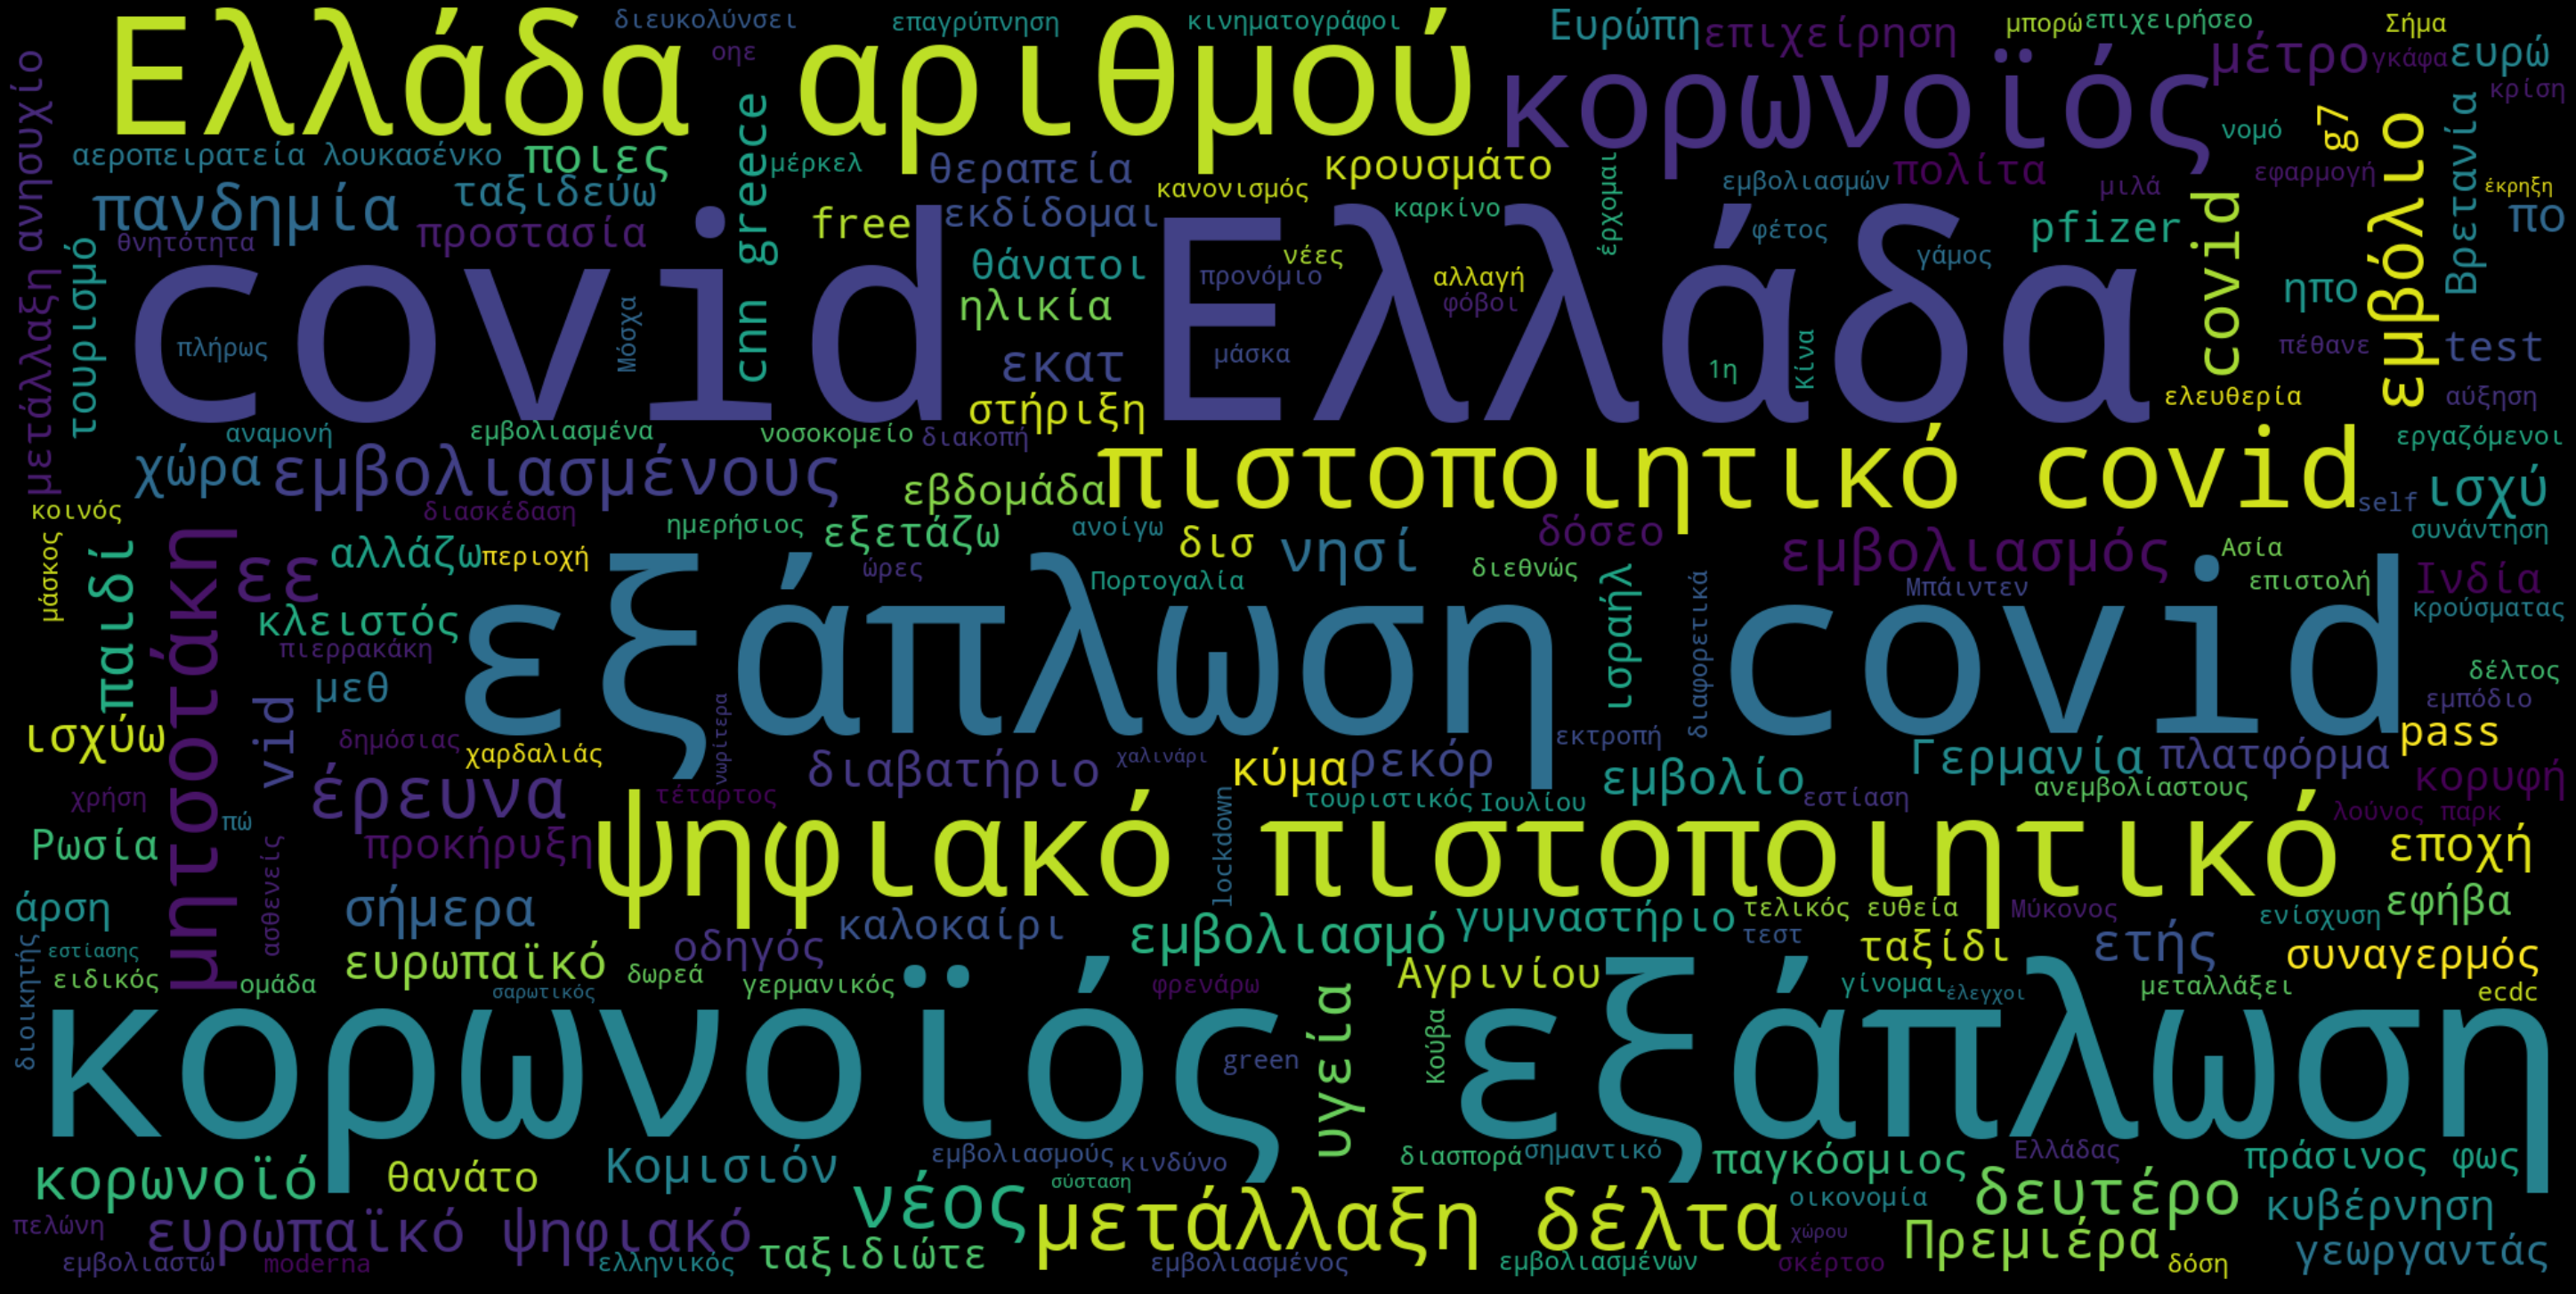

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Vectorization

Βρίσκω τις συχνότερες λέξεις

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['headline'])

In [ ]:
count_vector.shape

(210, 869)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  01  02  03  04  05  06  ...  όπως  όριά  όριο  όρους  όσο  όσους  ώρες
0    0   0   0   0   0   0   0  ...     0     0     0      0    0      0     0
1    0   0   0   0   0   0   0  ...     0     0     0      0    0      0     0
2    0   0   0   0   0   0   0  ...     0     0     0      0    0      0     0
3    0   0   0   0   0   0   0  ...     0     0     0      0    0      0     0
4    0   0   0   0   0   0   0  ...     0     0     0      0    0      0     0

[5 rows x 869 columns]

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(df['headline'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  05  06  07  12  ...  ταξιδεύουμε  ταξιδιώτες  υγείας  φως  ψηφιακό
0    0   0   0   0   0  ...            0           0       0    0        0
1    0   0   0   1   0  ...            0           0       0    0        0
2    0   0   0   0   0  ...            0           0       0    0        0
3    0   0   0   0   0  ...            0           0       0    0        0
4    0   0   0   0   0  ...            0           0       0    0        0

[5 rows x 106 columns]

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιόταα', 'γρήγορας', 'δίχω', 'εαυτή', 'εκάστο', 'ετέρο', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιώ', 'πολλός', 'προχθής', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτο', 'όποιας', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  12-15  cnn  covid  covid-19  ...  τουρισμό  υγεία  φως  χώρα  ψηφιακό
0    0      0    0      0         0  ...         0      0    0     0        0
1    0      0    0      1         0  ...         0      0    0     0        0
2    0      0    0      0         0  ...         0      0    0     0        0
3    0      0    0      1         0  ...         0      0    0     0        0
4    0      0    0      0         0  ...         0      0    0     0        0

[5 rows x 95 columns]

In [ ]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


06  19  covid  έρευνα  ...  μητσοτάκης  πιστοποιητικό  υγείας  ψηφιακό
0   0   0      0       0  ...           0              0       0        0
1   0   1      1       0  ...           0              0       0        0
2   0   0      0       0  ...           0              0       0        0
3   0   0      1       0  ...           0              0       0        0
4   0   0      0       0  ...           0              0       0        0

[5 rows x 20 columns]

In [ ]:
#cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bεμβ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
#count_vector = cv.fit_transform(df['headline'])
#results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
#results.head()

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(1, 1) ) #token_pattern = '\\bεμβ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

06  19  covid  έρευνα  ...  μητσοτάκης  πιστοποιητικό  υγείας  ψηφιακό
0   0   0      0       0  ...           0              0       0        0
1   0   1      1       0  ...           0              0       0        0
2   0   0      0       0  ...           0              0       0        0
3   0   0      1       0  ...           0              0       0        0
4   0   0      0       0  ...           0              0       0        0

[5 rows x 20 columns]

Πιο συχνές μονές λέξεις

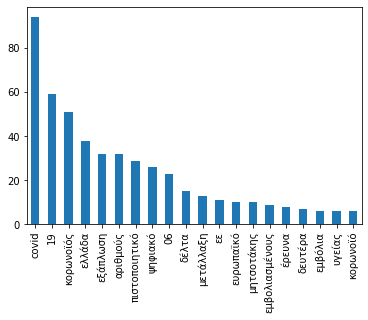

In [ ]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='bar')

Πιο συχνές δυάδες λέξεων

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bεμβ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

12 15  15 ετών  ...  πράσινο φως  ψηφιακό πιστοποιητικό
0      0        0  ...            0                      0
1      0        0  ...            0                      0
2      0        0  ...            0                      0
3      0        0  ...            0                      0
4      0        0  ...            0                      0

[5 rows x 20 columns]

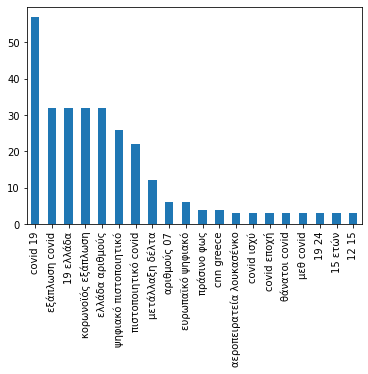

In [ ]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='bar')

Αξιοποιώ τις λειτουργίες της χρονοσειράς

In [ ]:
df.dtypes

headline    object
url         object
date        object
category    object
dtype: object

Μετατροπή της ημερομηνίας από object σε date

In [ ]:
pd.to_datetime(df.date).head()

0   2021-07-07
1   2021-07-07
2   2021-07-07
3   2021-06-07
4   2021-06-07
Name: date, dtype: datetime64[ns]

In [ ]:
df['date'] = pd.to_datetime(df.date, format='%d %m %Y ')
df['date']

0     2021-07-07
1     2021-07-07
2     2021-07-07
3     2021-07-06
4     2021-07-06
         ...    
205   2021-05-26
206   2021-05-26
207   2021-05-26
208   2021-05-26
209   2021-05-26
Name: date, Length: 210, dtype: datetime64[ns]

In [ ]:
df.dtypes

headline            object
url                 object
date        datetime64[ns]
category            object
dtype: object

Αλλάζω το ευρετήριο/index να είναι το dataframe

In [ ]:
df.set_index('date' , inplace=True)

Μετά από μια συγκεκριμένη ημερομηνία

In [ ]:
df['2021-05-25':]

Empty DataFrame
Columns: [headline, url, category]
Index: []

In [ ]:
import pandas as pd
%matplotlib inline

Γραμμές μεταξύ μιας συγκεκριμένης ημερομηνίας

In [ ]:
df['2021-06-30':'2021-06-01']

headline  ...  category
date                                                           ...          
2021-06-30   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-06-30   Green Pass: Πρεμιέρα από την Πέμπτη για το Ευ...  ...  ΠΟΛΙΤΙΚΗ
2021-06-29   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-06-29   ΕΕ: Πέντε νέες θεραπείες κατά της Covid 19 - ...  ...    ΚΟΣΜΟΣ
2021-06-29   Επιστολή της Κομισιόν στους «27» της ΕΕ για τ...  ...    ΚΟΣΜΟΣ
...                                                       ...  ...       ...
2021-06-02   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-06-02   Κορωνοϊός: Έρευνα για τη θνητότητα στη ΜΕΘ-CO...  ...    ΕΛΛΑΔΑ
2021-06-02   «Μονόδρομος τα εμβόλια»: Η νοσηλεύτρια που εμ...  ...    ΕΛΛΑΔΑ
2021-06-02   Εμβόλιο κορωνοϊός: Τη χορήγηση δύο δόσεων από...  ...    ΚΟΣΜΟΣ
2021-06-02   Τουρισμός: Πακέτο 420 εκατ. ευρώ για στήριξη ...  ...    ΕΛΛΑΔΑ

[132 rows x 3 columns]

In [ ]:
df['2021-06-30':'2021-06-01'].shape

(132, 3)

In [ ]:
df[df.index.month == 7]

headline  ...  category
date                                                           ...          
2021-07-07   Κορωνοϊός: Σαρωτικοί έλεγχοι σε χώρους εστίασ...  ...    ΕΛΛΑΔΑ
2021-07-07   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-07-07   Κυβέρνηση: Νωρίτερα τα μέτρα - «χαλινάρι» στη...  ...  ΠΟΛΙΤΙΚΗ
2021-07-06   Σύσταση ΠΟΥ για χρήση φαρμάκων για την αρθρίτ...  ...    ΚΟΣΜΟΣ
2021-07-06   Μετάλλαξη Δέλτα στο Ισραήλ: 500 νέα κρούσματα...  ...    ΚΟΣΜΟΣ
2021-07-06   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-07-05   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-07-05   Κορωνοϊός - Μητσοτάκης: Να επικεντρώσουμε την...  ...  ΠΟΛΙΤΙΚΗ
2021-07-05   Εμβόλια κατά των μεταλλάξεων: Τρεις αλήθειες ...  ...    ΚΟΣΜΟΣ
2021-07-04   Κορωνοϊός: Η θεωρία διαρροής από τη Γουχάν - ...  ...    ΚΟΣΜΟΣ
2021-07-04   Νότια Αφρική: Νέο ρεκόρ 26.000 ημερήσιων κρου...  ...    ΚΟΣΜΟΣ
2021-07-03   Πέτσας: Ανοιχτό το ενδεχόμενο για μέτρα και σ...  ...    ΕΛΛΑΔΑ
2021-07-03   Οδηγός διακοπών στα νησιά: Τι αλλάζει από Δευ...  ...    ΕΛΛΑΔΑ
2021-07-02   Καθηγητής Τούντας: Μέσα μαζικής μεταφοράς μόν...  ...    ΕΛΛΑΔΑ
2021-07-02   Διακοπές στα νησιά με τα πιστοποιητικά στο χέ...  ...    ΕΛΛΑΔΑ
2021-07-02   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-07-02   Λάμδα: Ανησυχία για ασυνήθιστες μεταλλάξεις τ...  ...    ΚΟΣΜΟΣ
2021-07-02   Πώς θα ταξιδεύουμε στα νησιά από τη Δευτέρα -...  ...    ΕΛΛΑΔΑ
2021-07-01   Χαρδαλιάς στο CNN Greece: Το κράτος Δικαίου α...  ...    ΕΛΛΑΔΑ
2021-07-01   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-07-01   Στο «πορτοκαλί» η Μύκονος - Πώς διαμορφώνεται...  ...    ΕΛΛΑΔΑ
2021-07-01    Πώς θα ταξιδεύουμε στα νησιά από τη Δευτέρα ...  ...    ΕΛΛΑΔΑ
2021-07-01   «Επιχείρηση Ελευθερία»: Νέοι κανόνες για εμβο...  ...     FOCUS
2021-07-01   Γεωργαντάς: Με ειδική εφαρμογή ο διαχωρισμός ...  ...    ΕΛΛΑΔΑ
2021-07-01   Εμβολιασμοί:  850.000 πολίτες έλαβαν το Ευρωπ...  ...    ΕΛΛΑΔΑ
2021-07-01   Green Pass: Σε εφαρμογή από σήμερα το Ευρωπαϊ...  ...  ΠΟΛΙΤΙΚΗ

[26 rows x 3 columns]

Συγκεκριμένους μήνες

In [ ]:
df[df.index.month.isin([5,6])]

headline  ...  category
date                                                           ...          
2021-06-30   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-06-30   Green Pass: Πρεμιέρα από την Πέμπτη για το Ευ...  ...  ΠΟΛΙΤΙΚΗ
2021-06-29   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-06-29   ΕΕ: Πέντε νέες θεραπείες κατά της Covid 19 - ...  ...    ΚΟΣΜΟΣ
2021-06-29   Επιστολή της Κομισιόν στους «27» της ΕΕ για τ...  ...    ΚΟΣΜΟΣ
...                                                       ...  ...       ...
2021-05-26   Το island hopping αλλάζει και «επιλέγει» yach...  ...    ΕΛΛΑΔΑ
2021-05-26   Στην τελική ευθεία το Πιστοποιητικό Covid: «Ο...  ...    ΕΛΛΑΔΑ
2021-05-26   Κορωνοϊός: Η εξάπλωση της Covid 19 στην Ελλάδ...  ...    ΕΛΛΑΔΑ
2021-05-26   Πελώνη για επίσκεψη Τσαβούσογλου: Δεν ενημερω...  ...  ΠΟΛΙΤΙΚΗ
2021-05-26   Εκτροπή αεροσκάφους: Έκτακτη συνεδρίαση του Σ...  ...  ΠΟΛΙΤΙΚΗ

[184 rows x 3 columns]